In [ ]:
# Andrea Mercado Jiménez
# Segundo examen parcial 
# 4 abril 2025

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.io import loadmat
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

## 1. Dataset de Coactivation matrix

In [57]:
mat_path = (r"C:\Users\andim\OneDrive\Escritorio\Sexto Semestre\Modelos Computacionales II\Coactivation_matrix.mat")
data = scipy.io.loadmat(mat_path)

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [61]:
coactivation_matrix = data['Coactivation_matrix']
coactivation_matrix.shape, coactivation_matrix[:5, :5]

((638, 638),
 array([[0.        , 0.16071429, 0.11148649, 0.        , 0.13809524],
        [0.16071429, 0.        , 0.06825939, 0.        , 0.04205607],
        [0.11148649, 0.06825939, 0.        , 0.22419929, 0.        ],
        [0.        , 0.        , 0.22419929, 0.        , 0.        ],
        [0.13809524, 0.04205607, 0.        , 0.        , 0.        ]]))

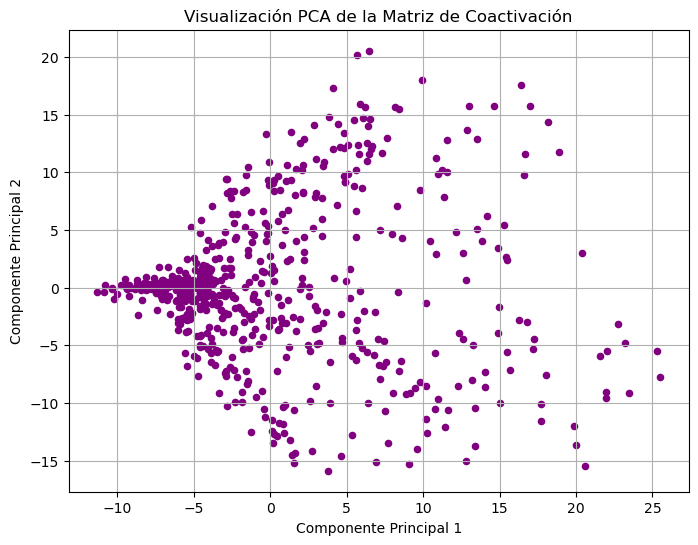

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(coactivation_matrix)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=20, color='purple')
plt.title('Visualización PCA de la Matriz de Coactivación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

#### Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)


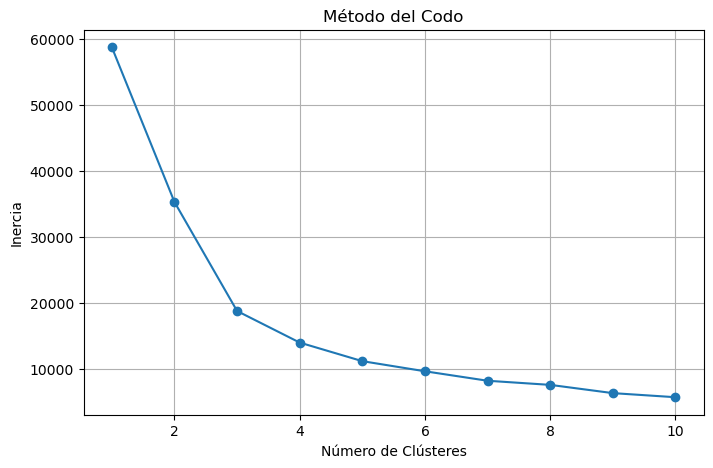

In [65]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(coactivation_matrix)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Método del codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [67]:
# Evaluar la puntuación para k=3 y k=4
silhouette_scores = {}
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_numeric)
    silhouette_scores[k] = silhouette_score(df_numeric, labels)

# Seleccionar el número óptimo de clusters según el mejor Silhouette Score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"El número óptimo de clusters basado en Silhouette Score es: {optimal_k}")

El número óptimo de clusters basado en Silhouette Score es: 4


#### Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset 


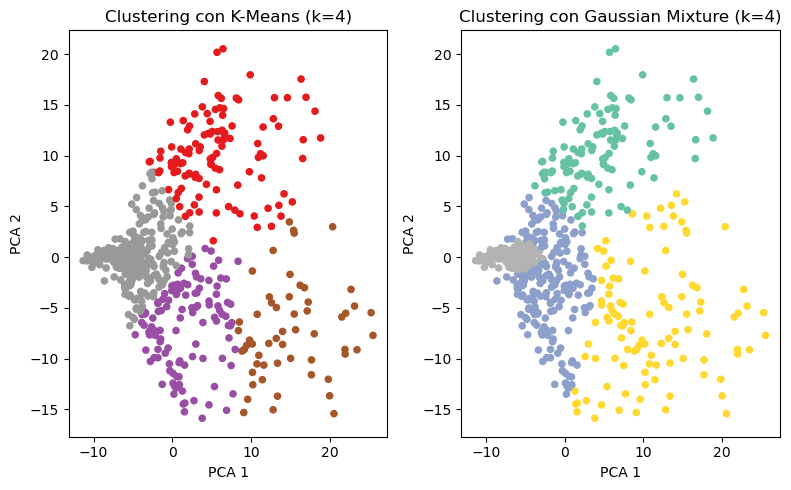

In [69]:
# K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Gaussian Mixture Model con k=4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# K-Means
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=20)
axs[0].set_title('Clustering con K-Means (k=4)')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')

# Gaussian Mixture
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set2', s=20)
axs[1].set_title('Clustering con Gaussian Mixture (k=4)')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

## 2. Brain tumor

In [74]:
# Cargar el dataset
brain_tumor_path =(r"C:\Users\andim\OneDrive\Escritorio\Sexto Semestre\Modelos Computacionales II\Brain Tumor.csv")
df_brain = pd.read_csv(brain_tumor_path)

df_brain.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [95]:
X = df.drop(columns=['Image', 'Class'])
y = df['Class']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### A. Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)



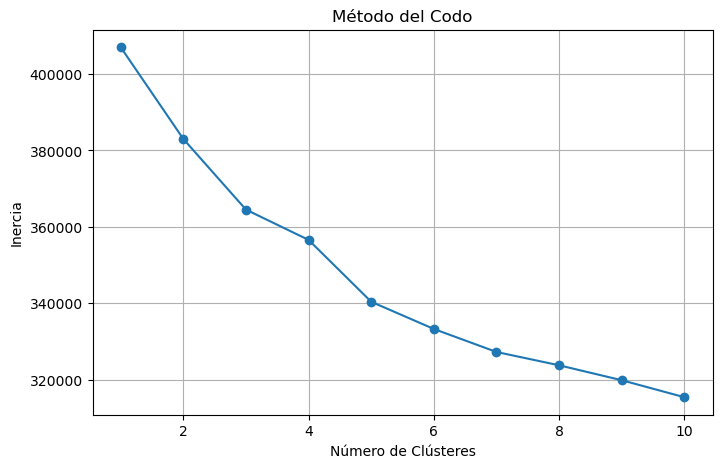

In [77]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clústeres")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

#### B. Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth



K-Means:
[[1978  101]
 [  80 1603]]
Gaussian Mixture:
[[2056   23]
 [  60 1623]]
Clustering Jerárquico:
[[  26 2053]
 [1589   94]]


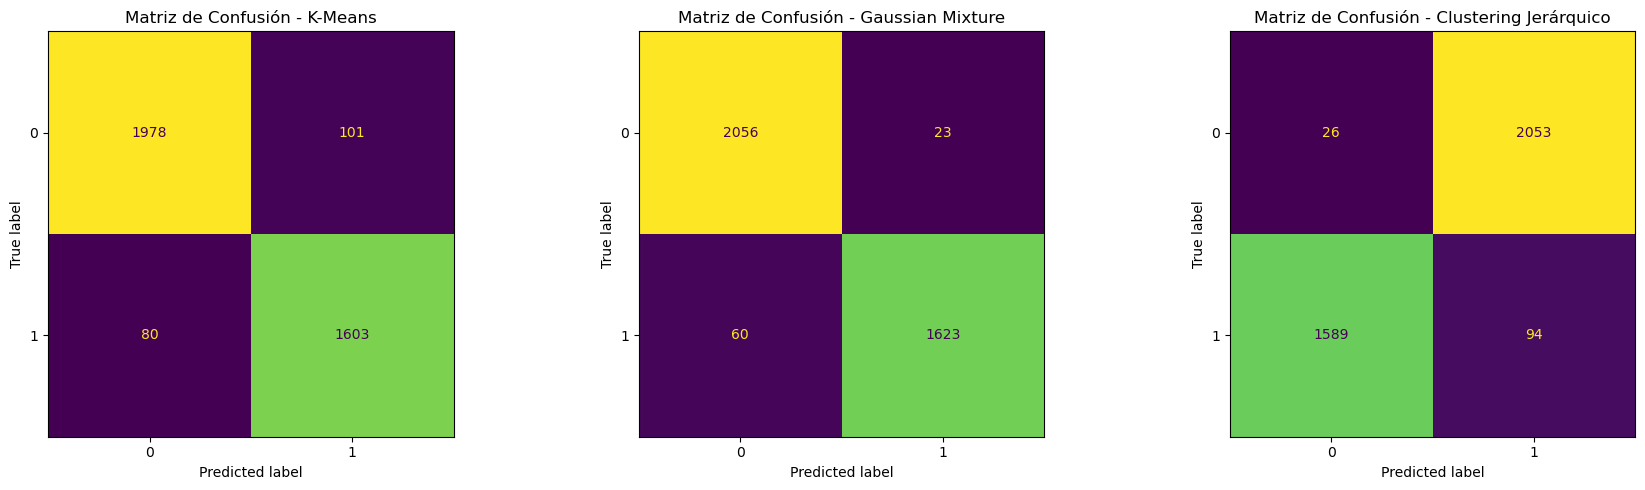

In [98]:
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Matriz de confusión
print("K-Means:")
print(confusion_matrix(y, kmeans_labels))

# Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

print("Gaussian Mixture:")
print(confusion_matrix(y, gmm_labels))

# Clustering Jerárquico
hc = AgglomerativeClustering(n_clusters=2)
hc_labels = hc.fit_predict(X_scaled)

print("Clustering Jerárquico:")
print(confusion_matrix(y, hc_labels))

# Matrices de confusión
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, labels, title in zip(
    axs,
    [kmeans_labels, gmm_labels, hier_labels],
    ["K-Means", "Gaussian Mixture", "Clustering Jerárquico"]
):
    cm = confusion_matrix(y, labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f"Matriz de Confusión - {title}")

plt.tight_layout()
plt.show()

#### C. ¿Qué método recomendarías para este dataset?, ¿Por qué?


In [ ]:
# Recomendaría utilizar el método de Gaussian Mixture, porque obtuvo la mejor matriz de confusión entre los tres métodos. Presentó la menor cantidad de errores (23 falsos positivos y 60 falsos negativo)s, lo que indica una mejor capacidad para separar correctamente las clases del dataset.

## 3. De su previa investigación:

In [ ]:
# ¿Qué es precision?
# Proporción de predicciones positivas que realmente son correctas. De todos los ejemplos que el modelo predijo como positivos, ¿cuántos realmente eran positivos?
# Alta precisión significa que el modelo predice pocos falsos positivos.


# ¿Qué es accuracy?
# Proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones. Es una medida global del rendimiento del modelo.
# Alta exactitud indica que el modelo hace pocas predicciones incorrectas en general, pero en clases desbalanceadas puede no ser una métrica confiable.


# ¿Qué es recall?
# Capacidad del modelo para identificar correctamente todas las instancias positivas. De todos los casos que realmente son positivos, ¿cuántos fueron identificados correctamente por el modelo?
# Alta sensibilidad significa que el modelo detecta la mayoría de los casos positivos, pero podría cometer más falsos positivos.


# ¿Qué es f1-score?
# Es la media armónica entre la precisión y el recall. Es útil cuando se quiere un balance entre ambas, ya que penaliza los modelos que tienen una gran diferencia entre precisión y recall.
# F1-score alto indica que el modelo tiene un buen balance entre precisión y recall. Es útil cuando las clases están desbalanceadas.

## 4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?

In [ ]:
# Las métricas como precisión, recall, accuracy y F1-score se obtienen a partir de los valores que están en la matriz de confusión, que compara lo que el modelo predijo con la realidad.
# la matriz de confusión es la base para calcular todas esas métricas, porque en ella están los datos sobre qué tanto acertó o falló el modelo.

## 5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [101]:
# Almacenar resultados
results = {}

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
if sum(kmeans_labels == y_true) < sum(1 - kmeans_labels == y_true):
    kmeans_labels = 1 - kmeans_labels
results['K-Means'] = kmeans_labels

# Gaussian Mixture
gm = GaussianMixture(n_components=2, random_state=42)
gm_labels = gm.fit_predict(X_scaled)
if sum(gm_labels == y_true) < sum(1 - gm_labels == y_true):
    gm_labels = 1 - gm_labels
results['Gaussian Mixture'] = gm_labels

# Clustering Jerárquico
hc = AgglomerativeClustering(n_clusters=2)
hc_labels = hc.fit_predict(X_scaled)
if sum(hc_labels == y_true) < sum(1 - hc_labels == y_true):
    hc_labels = 1 - hc_labels
results['Clustering Jerárquico'] = hc_labels

# Calcular métricas
for method, predicted in results.items():
    print(f"--- {method} ---")
    print("Accuracy:", accuracy_score(y_true, predicted))
    print("Precision:", precision_score(y_true, predicted))
    print("Recall:", recall_score(y_true, predicted))
    print("F1-score:", f1_score(y_true, predicted))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, predicted))
    print()

--- K-Means ---
Accuracy: 0.9518872939925571
Precision: 0.9407276995305164
Recall: 0.952465834818776
F1-score: 0.9465603779155595
Matriz de Confusión:
[[1978  101]
 [  80 1603]]

--- Gaussian Mixture ---
Accuracy: 0.9779372674109517
Precision: 0.9860267314702309
Recall: 0.964349376114082
F1-score: 0.9750675878642235
Matriz de Confusión:
[[2056   23]
 [  60 1623]]

--- Clustering Jerárquico ---
Accuracy: 0.9681020733652312
Precision: 0.9839009287925696
Recall: 0.9441473559120618
F1-score: 0.9636143117040631
Matriz de Confusión:
[[2053   26]
 [  94 1589]]

